In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, RANSACRegressor, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from pyspark.sql.functions import *

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning

In [0]:
query = "SELECT * FROM pi_toxicity_extended"
b = spark.sql(query)
df_b = b.toPandas()
df_b.head()


,Percent Dead,WW_RET_POND_COD (D-1),WW_RET_POND_COD (D-2),WW_RET_POND_COD (D-3),WW_RET_POND_COD (-3D to D Max),WW_RET_POND_COD (-3D to D Mean),WW_RET_POND_COD (-3D to 3D Mean),WW_RET_POND_COD,WW_RET_POND_OG (D-1),WW_RET_POND_OG (D-2),WW_RET_POND_OG (D-3),WW_RET_POND_OG (-3D to D Max),WW_RET_POND_OG (-3D to D Mean),WW_RET_POND_OG (-3D to 3D Mean),WW_RET_POND_OG,WW_MILLAPI_COD (D-1),WW_MILLAPI_COD (D-2),WW_MILLAPI_COD (D-3),WW_MILLAPI_COD (-3D to D Max),WW_MILLAPI_COD (-3D to D Mean),WW_MILLAPI_COD (-3D to 3D Mean),WW_MILLAPI_COD,WW_MILLAPI_OG (D-1),WW_MILLAPI_OG (D-2),WW_MILLAPI_OG (D-3),WW_MILLAPI_OG (-3D to D Max),WW_MILLAPI_OG (-3D to D Mean),WW_MILLAPI_OG (-3D to 3D Mean),WW_MILLAPI_OG,CSB_COD (D-1),CSB_COD (D-2),CSB_COD (D-3),CSB_COD (-3D to D Max),CSB_COD (-3D to D Mean),CSB_COD (-3D to 3D Mean),CSB_COD,WW_PONDA_OUT_COD (D-1),WW_PONDA_OUT_COD (D-2),WW_PONDA_OUT_COD (D-3),WW_PONDA_OUT_COD (-3D to D Max),...,PONDD_TO_B_TSS_WATER (D-3),PONDD_TO_B_TSS_WATER (-3D to D Max),PONDD_TO_B_TSS_WATER (-3D to D Mean),PONDD_TO_B_TSS_WATER (-3D to 3D Mean),PONDD_TO_B_TSS_WATER,P32_32G40_COD (D-1),P32_32G40_COD (D-2),P32_32G40_COD (D-3),P32_32G40_COD (-3D to D Max),P32_32G40_COD (-3D to D Mean),P32_32G40_COD (-3D to 3D Mean),P32_32G40_COD,P32_32G40_OG (D-1),P32_32G40_OG (D-2),P32_32G40_OG (D-3),P32_32G40_OG (-3D to D Max),P32_32G40_OG (-3D to D Mean),P32_32G40_OG (-3D to 3D Mean),P32_32G40_OG,P32_32G40_TSS (D-1),P32_32G40_TSS (D-2),P32_32G40_TSS (D-3),P32_32G40_TSS (-3D to D Max),P32_32G40_TSS (-3D to D Mean),P32_32G40_TSS (-3D to 3D Mean),P32_32G40_TSS,34DAF_OUT_COD (D-1),34DAF_OUT_COD (D-2),34DAF_OUT_COD (D-3),34DAF_OUT_COD (-3D to D Max),34DAF_OUT_COD (-3D to D Mean),34DAF_OUT_COD (-3D to 3D Mean),34DAF_OUT_COD,34DAF_OUT_OG (D-1),34DAF_OUT_OG (D-2),34DAF_OUT_OG (D-3),34DAF_OUT_OG (-3D to D Max),34DAF_OUT_OG (-3D to D Mean),34DAF_OUT_OG (-3D to 3D Mean),34DAF_OUT_OG
0,0.0,133.0,117.0,76.0,133.0,110.75,120.428571,117.0,14.000000,0.200000,13.200000,17.600000,11.250000,12.328571,17.600000,160.0,160.0,160.0,160.0,160.0,160.0,160.0,43.000000,49.000000,21.799999,452.899994,141.674998,91.114285,452.899994,200,200,200,200,200,200,200,42.0,80.0,87.0,87.0,...,24.376923,34.229487,23.296154,23.170513,23.005128,43.0,58.0,50.0,58.0,50.25,48.285714,50.0,1.4,2.5,1.5,2.5,1.625,1.471429,1.1,45,50,36,50,43.25,45.285714,42,63.841463,64.219512,65.246914,72.195122,64.434959,64.96777,64.658537,2.330488,2.204878,2.38642,3.403659,2.264736,2.313763,2.152439
1,0.0,102.0,106.0,123.0,123.0,105.00,106.285714,89.0,29.879999,48.200001,25.410000,48.200001,29.712500,24.580000,15.360000,160.0,160.0,160.0,160.0,160.0,160.0,160.0,14.200000,19.070000,13.810000,19.940001,16.755000,17.884286,19.940001,200,200,200,200,200,200,200,51.0,48.0,60.0,66.0,...,24.376923,34.229487,23.296154,23.170513,23.005128,45.0,51.0,49.0,51.0,46.50,44.285714,41.0,1.0,1.1,2.6,2.6,1.475,1.357143,1.2,19,23,23,23,20.25,22.000000,16,63.841463,64.219512,65.246914,72.195122,64.434959,64.96777,64.658537,2.330488,2.204878,2.38642,3.403659,2.264736,2.313763,2.152439
2,0.0,260.0,1000.0,132.0,1000.0,400.50,292.285714,210.0,64.589996,75.699997,14.170000,75.699997,49.789999,37.937142,44.700001,470.0,470.0,470.0,470.0,470.0,470.0,470.0,16.590000,12.940000,20.059999,20.059999,15.722500,29.898571,13.300000,200,200,200,200,200,200,200,162.0,90.0,92.0,162.0,...,24.376923,34.229487,23.296154,23.170513,23.005128,48.0,48.0,43.0,54.0,48.25,46.142857,54.0,1.1,0.9,1.2,1.4,1.150,1.114286,1.4,19,30,17,30,20.75,21.142857,17,63.841463,64.219512,65.246914,72.195122,64.434959,64.96777,64.658537,2.330488,2.204878,2.38642,3.403659,2.264736,2.313763,2.152439
3,0.0,114.0,130.0,166.0,166.0,124.50,122.285714,88.0,24.200001,28.400000,26.700001,28.400000,24.775000,23.471429,19.799999,111.0,111.0,111.0,111.0,111.0,111.0,111.0,19.500000,16.700001,12.100000,19.500000,16.100000,14.642857,16.100000,200,200,200,200,200,200,200,158.0,116.0,147.0,158.0,...,24.376923,34.229487,23.296154,23.170513,23.005128,59.0,63.0,70.0,70.0,64.25,62.285714,6

In [0]:
# df_b['Sample Date'] = pd.to_datetime(df_b['Sample Date'])
# df_b.info(verbose=True)

In [0]:
# drop all columns except the ones highlighted in the feature selection
# df_b = df_b[['PercentDead','WW_PONDA_OUT_COD(D-1)', 'WW_PONDA_OUT_COD(D-2)',
#        'WW_PONDA_OUT_COD', 'WW_PONDA_OUT_OG(D-1)', 'P32_32G40_COD(D-1)',
#        'P32_32G40_COD', 'P32_32G40_OG(D-1)', 'P32_32G40_OG(D-2)',
#        'P32_32G40_OG']]
# df_b.info(verbose=True)

In [0]:
y = df_b['Percent Dead']
cols_to_remove = ['Percent Dead', 'CSB_COD']
X = df_b.drop(cols_to_remove, axis=1)

In [0]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
# prepare configuration for cross validation test harness
seed = 42
# Test fit using {learner}
dict = {'GradientBoostingRegressor':'GBR', 'RandomForestRegressor':'RFR', 
                'ElasticNet':'EN', 'HuberRegressor':'HR', 'PassiveAggressiveRegressor':'PAR',
                'KNeighborsRegressor':'KNN', 'SVR':'SVR', 'LinearSVR':'LSVR',
                'RANSACRegressor':'RANSACR', 'MLPRegressor':'MLP'}

for learner in [GradientBoostingRegressor, RandomForestRegressor, MLPRegressor,
                ElasticNet, HuberRegressor, PassiveAggressiveRegressor,
                KNeighborsRegressor, SVR, LinearSVR]:  #RANSACRegressor 
      kfold = model_selection.KFold(n_splits=7, random_state=seed)
      learner = learner()
      learner_name = str(learner).split("(", maxsplit=1)[0]
      #cv_results = model_selection.cross_val_score(learner, X, y, cv=kfold, scoring=scoring)
      cv_results = model_selection.cross_val_score(learner, X, y, cv=kfold, scoring='r2')
      results.append(cv_results)
      names.append(learner_name)
      msg = "%s: %f (%f)" % (learner_name, cv_results.mean(), cv_results.std())
      print(msg)


GradientBoostingRegressor: -0.324056 (0.485929)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
RandomForestRegressor: -0.684273 (0.927651)
MLPRegressor: -9727.449839 (8044.243829)
ElasticNet: -0.322110 (0.545019)
HuberRegressor: -7.498991 (10.996596)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

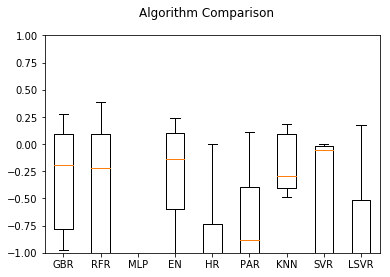

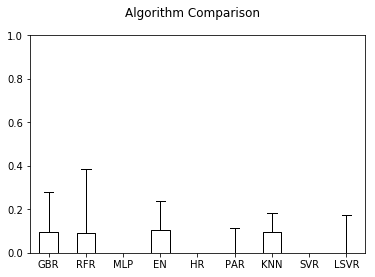

In [0]:
# boxplot for algorith comparison
axis_names = []
for item in names:
  print(dict[item])
  axis_names.append(dict[item])
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(-1,1)
plt.show()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(0,1)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  
# Scale dataset
scaler = preprocessing.StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = y_train 
y_test_scale = y_test

/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import linecache

In [0]:
CC = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .05, 0.1, .5, 1]
r2 = -np.inf
for c in CC:
  regr = PassiveAggressiveRegressor(C=c, max_iter=1000, random_state=42, tol=1e-3)
  regr.fit(X_train_scale, y_train_scale)
  y_pred = regr.predict(X_test_scale)
  if r2_score(y_test_scale, y_pred) > r2:
      c_best = c
      r2 = r2_score(y_test_scale, y_pred)
regr = PassiveAggressiveRegressor(C = c_best, max_iter=1000, random_state=0, tol=1e-3)
regr.fit(X_train_scale, y_train_scale)
y_pred = regr.predict(X_test_scale)
r2 = r2_score(y_test_scale, y_pred)
print(c_best)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scale, y_pred))
print('Variance score: %.2f' % r2_score(y_test_scale, y_pred))

0.0005
Mean squared error: 0.03
Variance score: 0.21

##Doing the same with feature selection

In [0]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [0]:
print('Top Correlated Pairs:')
print(get_top_abs_correlations(X, n=20))

Top Correlated Pairs:
WW_PONDA_OUT_OG (-3D to D Max) WW_PONDA_OUT_OG (-3D to D Mean) 0.976847
34DAF_OUT_COD (-3D to D Mean) 34DAF_OUT_COD (-3D to 3D Mean) 0.958505
34DAF_OUT_COD (D-1) 34DAF_OUT_COD (-3D to D Mean) 0.957909
WW_PONDA_OUT_TSS (-3D to D Max) WW_PONDA_OUT_TSS (-3D to D Mean) 0.954050
34DAF_OUT_COD (D-2) 34DAF_OUT_COD (-3D to D Mean) 0.951894
WW_RET_POND_OG (-3D to D Max) WW_RET_POND_OG (-3D to D Mean) 0.951359
P32_32G40_TSS (-3D to D Max) P32_32G40_TSS (-3D to D Mean) 0.944800
P32_32G40_OG (-3D to D Max) P32_32G40_OG (-3D to D Mean) 0.941369
34DAF_OUT_COD (-3D to D Max) 34DAF_OUT_COD (-3D to D Mean) 0.939846
34DAF_OUT_OG (-3D to D Max) 34DAF_OUT_OG (-3D to D Mean) 0.936636
PONDD_TO_B_PH (-3D to D Mean) PONDD_TO_B_PH (-3D to 3D Mean) 0.935385
PONDD_TO_B_OG_HEX (-3D to D Max) PONDD_TO_B_OG_HEX (-3D to D Mean) 0.934248
34DAF_OUT_COD (D-1) 34DAF_OUT_COD (-3D to 3D Mean) 0.933818
P32_32G40_COD (-3D to D Mean) P32_32G40_COD (-3D to 3D Mean) 0.931590
34DAF_OUT_COD (D-3) 34DAF_OUT_COD (-3D to D Mean) 0.929255
PONDD_TO_B_TSS_WATER (D-3) PONDD_TO_B_TSS_WATER (-3D to D Max) 0.928593
34DAF_OUT_COD (-3D to 3D Mean) 34DAF_OUT_COD 0.928065
P32_32G40_TSS (-3D to D Mean) P32_32G40_TSS (-3D to 3D Mean) 0.923861
PONDD_TO_B_PH (-3D to D Max) PONDD_TO_B_PH (-3D to D Mean) 0.919994
PONDD_TO_B_COD (-3D to D Mean) PONDD_TO_B_COD (-3D to 3D Mean) 0.918585
dtype: float64

In [0]:
# Removing features with 0.97 & above correlation
# keeping the ones with 1) higher count 2) higher std 3) keeping total instead of dissolved
# list_to_remove = ['WW_PONDA_OUT_PH (-3D to D Mean)', 'WW_PONDA_OUT_PH (-3D to 3D Mean)', 'WW_PONDA_OUT_PH (D-2)', 'WW_PONDA_OUT_PH (D-2)', 'WW_PONDA_OUT_PH (D-3)', 'WW_PONDA_OUT_PH (-3D to D Max)', 'WW_PONDA_OUT_PH (D-1)', 'WW_PONDA_OUT_OG (-3D to D Mean)']
df = X.copy()
# df.drop(list_to_remove, axis=1, inplace=True)
df.shape

Out[12]: (816, 118)

In [0]:
# Scaling features to [0,1]
def scaling(df, str=['Time']):
  """ gets a dataframe (df) and a column name(Time/Date) and normalize all columns except col named str"""
  list0 = df.columns.difference(str)
  df_norm = df.copy()
  for col in list0:
    df_norm[col] = (df_norm[col]-df_norm[col].min())/(df_norm[col].max()-df_norm[col].min()) 
  return df_norm

def variance_calc(df, str=['Time']):
    list0 = df.columns.difference(str)
    NN = len(list0)
    var_mat = pd.DataFrame(np.zeros([NN, 2]))
    counter = 0
    for col in list0:
      # calculating variance of (normalized) features
      var_mat[0][counter] = col
      var_mat[1][counter] = df_norm[col].var()
      counter +=1
    var_mat.columns = ['feature', 'vari']
    return var_mat

In [0]:
# no variance in teh sollfowing features
# df.drop(['Hydroxide (OH)', 'CSB_COD', 'Max Temp Flag', 'Min Temp Flag', 'WW_FLARE_POND_COD'], axis=1, inplace=True)

In [0]:
df_norm = scaling(df, str=[])
varm = variance_calc(df_norm, str=[])
# Showing features with low variance
varm.sort_values(by='vari').head(20)

,feature,vari
68,PONDD_TO_B_TSS_WATER (D-3),0.001468
95,WW_PONDA_OUT_OG (D-2),0.001507
64,PONDD_TO_B_TSS_WATER (-3D to D Max),0.001650
13,34DAF_OUT_OG (D-3),0.001769
7,34DAF_OUT_OG,0.001833
94,WW_PONDA_OUT_OG (D-1),0.001853
26,P32_32G40_COD (D-3),0.001876
25,P32_32G40_COD (D-2),0.001989
39,P32_32G40_TSS (D-2),0.002013
90,WW_PONDA_OUT_OG,0.002035


In [0]:
# Selecting features with lowest variance
var_threshold = 0.01
low_var_features = varm.feature[varm.vari < var_threshold]
df_norm.drop(low_var_features, axis=1, inplace=True)
df_norm.shape

Out[16]: (816, 43)

In [0]:
# remove empty columns
df_norm.info(verbose=True)
null_cols = ['CSB_COD (D-1)', 'CSB_COD (D-2)', 'CSB_COD (D-3)', 'CSB_COD (-3D to D Max)', 'CSB_COD (-3D to D Mean)', 'CSB_COD (-3D to 3D Mean)']
df_norm.drop(null_cols, axis=1, inplace=True)
df_norm.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 43 columns):
WW_RET_POND_COD (D-1) 816 non-null float64
WW_RET_POND_COD (D-2) 816 non-null float64
WW_RET_POND_COD (D-3) 816 non-null float64
WW_RET_POND_COD (-3D to D Max) 816 non-null float64
WW_RET_POND_COD (-3D to D Mean) 816 non-null float64
WW_RET_POND_COD (-3D to 3D Mean) 816 non-null float64
WW_RET_POND_COD 816 non-null float64
WW_MILLAPI_COD (D-1) 816 non-null float64
WW_MILLAPI_COD (D-3) 816 non-null float64
WW_MILLAPI_COD (-3D to D Mean) 816 non-null float64
WW_MILLAPI_COD 816 non-null float64
WW_MILLAPI_OG (D-1) 816 non-null float64
WW_MILLAPI_OG (D-2) 816 non-null float64
WW_MILLAPI_OG (D-3) 816 non-null float64
WW_MILLAPI_OG (-3D to D Max) 816 non-null float64
WW_MILLAPI_OG (-3D to 3D Mean) 816 non-null float64
WW_MILLAPI_OG 816 non-null float64
CSB_COD (D-1) 0 non-null float64
CSB_COD (D-2) 0 non-null float64
CSB_COD (D-3) 0 non-null float64
CSB_COD (-3D to D Max) 0 non-null float64
CSB_COD (-3D to D Mean) 0 non-null float64
CSB_COD (-3D to 3D Mean) 0 non-null float64
WW_PONDA_OUT_COD (D-3) 816 non-null float64
WW_PONDA_OUT_COD (-3D to D Max) 816 non-null float64
WW_PONDA_OUT_TSS (-3D to D Max) 816 non-null float64
PONDD_TO_B_COD (D-2) 816 non-null float64
PONDD_TO_B_COD (-3D to D Mean) 816 non-null float64
PONDD_TO_B_COD (-3D to 3D Mean) 816 non-null float64
PONDD_TO_B_PH (D-1) 816 non-null float64
PONDD_TO_B_PH (D-2) 816 non-null float64
PONDD_TO_B_PH (D-3) 816 non-null float64
PONDD_TO_B_PH (-3D to D Max) 816 non-null float64
PONDD_TO_B_PH (-3D to D Mean) 816 non-null float64
PONDD_TO_B_PH (-3D to 3D Mean) 816 non-null float64
PONDD_TO_B_PH 816 non-null float64
PONDD_TO_B_OG_HEX (-3D to 3D Mean) 816 non-null float64
PONDD_TO_B_TSS_WATER (D-1) 816 non-null float64
PONDD_TO_B_TSS_WATER (D-2) 816 non-null float64
PONDD_TO_B_TSS_WATER 816 non-null float64
P32_32G40_COD (-3D to D Mean) 816 non-null float64
P32_32G40_COD (-3D to 3D Mean) 816 non-null float64
P32_32G40_OG (-3D to 3D Mean) 816 non-null float64
dtypes: float64(43)
memory usage: 274.2 KB
Out[17]: (816, 37)

In [0]:
list00 = df_norm.columns
# df_norm.dropna()

In [0]:
selector = SelectKBest(mutual_info_regression, k=29)
df_new = selector.fit_transform(df_norm, y)
selected_features = df_norm.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
selected_features

Out[19]: array(['WW_RET_POND_COD (D-1)', 'WW_RET_POND_COD (D-2)',
 'WW_RET_POND_COD (D-3)', 'WW_RET_POND_COD (-3D to D Max)',
 'WW_RET_POND_COD (-3D to 3D Mean)', 'WW_RET_POND_COD',
 'WW_MILLAPI_COD (D-3)', 'WW_MILLAPI_COD (-3D to D Mean)',
 'WW_MILLAPI_COD', 'WW_MILLAPI_OG (D-2)',
 'WW_MILLAPI_OG (-3D to D Max)', 'WW_MILLAPI_OG (-3D to 3D Mean)',
 'WW_MILLAPI_OG', 'WW_PONDA_OUT_COD (D-3)',
 'WW_PONDA_OUT_COD (-3D to D Max)',
 'WW_PONDA_OUT_TSS (-3D to D Max)', 'PONDD_TO_B_COD (D-2)',
 'PONDD_TO_B_COD (-3D to D Mean)',
 'PONDD_TO_B_COD (-3D to 3D Mean)', 'PONDD_TO_B_PH (D-2)',
 'PONDD_TO_B_PH (D-3)', 'PONDD_TO_B_PH (-3D to D Max)',
 'PONDD_TO_B_PH (-3D to D Mean)', 'PONDD_TO_B_PH (-3D to 3D Mean)',
 'PONDD_TO_B_OG_HEX (-3D to 3D Mean)', 'PONDD_TO_B_TSS_WATER',
 'P32_32G40_COD (-3D to D Mean)', 'P32_32G40_COD (-3D to 3D Mean)',
 'P32_32G40_OG (-3D to 3D Mean)'], dtype=object)

In [0]:
selector = SelectKBest(mutual_info_regression, k=9)
df_new = selector.fit_transform(df_norm, y)
selected_features = df_norm.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
selected_features

Out[20]: array(['WW_RET_POND_COD (-3D to D Max)',
 'WW_RET_POND_COD (-3D to 3D Mean)', 'WW_MILLAPI_OG (-3D to D Max)',
 'WW_MILLAPI_OG (-3D to 3D Mean)',
 'WW_PONDA_OUT_COD (-3D to D Max)',
 'WW_PONDA_OUT_TSS (-3D to D Max)',
 'PONDD_TO_B_COD (-3D to D Mean)', 'P32_32G40_COD (-3D to D Mean)',
 'P32_32G40_OG (-3D to 3D Mean)'], dtype=object)

In [0]:
# Removed features at this stage
list00.difference(selected_features)

Out[21]: Index(['P32_32G40_COD (-3D to 3D Mean)', 'PONDD_TO_B_COD (-3D to 3D Mean)',
 'PONDD_TO_B_COD (D-2)', 'PONDD_TO_B_OG_HEX (-3D to 3D Mean)',
 'PONDD_TO_B_PH', 'PONDD_TO_B_PH (-3D to 3D Mean)',
 'PONDD_TO_B_PH (-3D to D Max)', 'PONDD_TO_B_PH (-3D to D Mean)',
 'PONDD_TO_B_PH (D-1)', 'PONDD_TO_B_PH (D-2)', 'PONDD_TO_B_PH (D-3)',
 'PONDD_TO_B_TSS_WATER', 'PONDD_TO_B_TSS_WATER (D-1)',
 'PONDD_TO_B_TSS_WATER (D-2)', 'WW_MILLAPI_COD',
 'WW_MILLAPI_COD (-3D to D Mean)', 'WW_MILLAPI_COD (D-1)',
 'WW_MILLAPI_COD (D-3)', 'WW_MILLAPI_OG', 'WW_MILLAPI_OG (D-1)',
 'WW_MILLAPI_OG (D-2)', 'WW_MILLAPI_OG (D-3)', 'WW_PONDA_OUT_COD (D-3)',
 'WW_RET_POND_COD', 'WW_RET_POND_COD (-3D to D Mean)',
 'WW_RET_POND_COD (D-1)', 'WW_RET_POND_COD (D-2)',
 'WW_RET_POND_COD (D-3)'],
 dtype='object')

In [0]:
X_selected = df[selected_features]

In [0]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
# prepare configuration for cross validation test harness
seed = 42
# Test fit using {learner}
dict = {'GradientBoostingRegressor':'GBR', 'RandomForestRegressor':'RFR', 
                'ElasticNet':'EN', 'HuberRegressor':'HR', 'PassiveAggressiveRegressor':'PAR',
                'KNeighborsRegressor':'KNN', 'SVR':'SVR', 'LinearSVR':'LSVR',
                'RANSACRegressor':'RANSACR', 'MLPRegressor':'MLP'}

for learner in [GradientBoostingRegressor, RandomForestRegressor, MLPRegressor,
                ElasticNet, HuberRegressor, PassiveAggressiveRegressor,
                KNeighborsRegressor, SVR, LinearSVR]:  #RANSACRegressor 
      kfold = model_selection.KFold(n_splits=7, random_state=seed)
      learner = learner()
      learner_name = str(learner).split("(", maxsplit=1)[0]
      #cv_results = model_selection.cross_val_score(learner, X, y, cv=kfold, scoring=scoring)
      cv_results = model_selection.cross_val_score(learner, X_selected, y, cv=kfold, scoring='r2')
      results.append(cv_results)
      names.append(learner_name)
      msg = "%s: %f (%f)" % (learner_name, cv_results.mean(), cv_results.std())
      print(msg)

GradientBoostingRegressor: -0.250514 (0.596954)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
RandomForestRegressor: -0.584268 (1.041376)
MLPRegressor: -359.113820 (487.570736)
ElasticNet: -0.209243 (0.352465)
HuberRegressor: -0.137607 (0.135218)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
 FutureWarning)
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have be

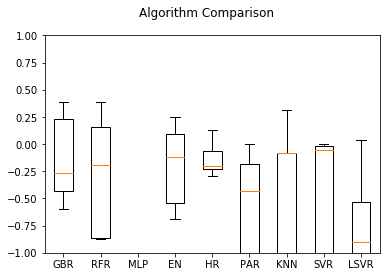

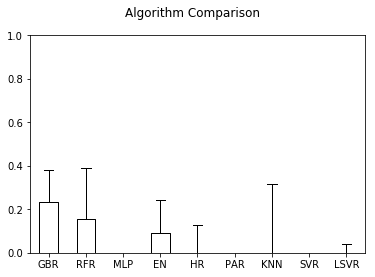

In [0]:
# boxplot for algorith comparison
axis_names = []
for item in names:
  print(dict[item])
  axis_names.append(dict[item])
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(-1,1)
plt.show()
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(axis_names)
ax.set_ylim(0,1)
plt.show()

##ElasticNet with top 30 features

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)  
# Scale dataset
scaler = preprocessing.StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = y_train 
y_test_scale = y_test

/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import linecache

In [0]:
alpha = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .04, .05, 0.07, 0.1, .5, 1]
l1_ratio = [0.1, .15, 0.2, .25, .3, .4, 0.5, .6, .8, .9]
r2 = -np.inf
for a in alpha:
  for l in l1_ratio:
    regr = ElasticNet(alpha=a, l1_ratio=l, random_state=42)
    regr.fit(X_train_scale, y_train_scale)
    y_pred = regr.predict(X_test_scale)
    if r2_score(y_test_scale, y_pred) > r2:
        a_best = a
        l_best = l
        r2 = r2_score(y_test_scale, y_pred)
regr = ElasticNet(alpha=a_best, l1_ratio=l_best, random_state=42)
regr.fit(X_train_scale, y_train_scale)
y_pred = regr.predict(X_test_scale)
r2 = r2_score(y_test_scale, y_pred)
print(a_best, l_best)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scale, y_pred))
print('Variance score: %.2f' % r2_score(y_test_scale, y_pred))

1e-07 0.1
Mean squared error: 0.04
Variance score: 0.25

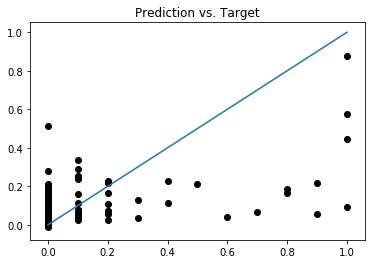

In [0]:
plt.scatter(y_test_scale,  y_pred, color='black')
sns.lineplot([0, 1],[0, 1])
plt.title('Prediction vs. Target')
plt.show()

## Optimum No. of Features for ElasticNet

In [0]:
nn_list = []
r2_list = []
for nn in range(5,30):
  # selecting top nn features
  selector = SelectKBest(mutual_info_regression, k=nn)
  df_new = selector.fit_transform(df_norm, y)
  selected_featuresnn = df_norm.columns.values[selector.get_support()]
  #scores = selector.scores_[selector.get_support()]
  X_selected = df[selected_featuresnn]
  X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)  
  # Scale dataset
  scaler = preprocessing.StandardScaler()
  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)
  y_train_scale = y_train 
  y_test_scale = y_test
  
  alpha = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .04, .05, 0.09, 0.1, .25, .5, 1]
  l1_ratio = [.05, 0.1, .12, 0.2, .25, .3, .4, 0.5, .6, .8, .9]
  r2 = -np.inf
  for a in alpha:
    for l in l1_ratio:
      regr = ElasticNet(alpha=a, l1_ratio=l, random_state=42)
      regr.fit(X_train_scale, y_train_scale)
      y_pred = regr.predict(X_test_scale)
      if r2_score(y_test_scale, y_pred) > r2:
        a_best = a
        l_best = l
        r2 = r2_score(y_test_scale, y_pred)
  regr = ElasticNet(alpha=a_best, l1_ratio=l_best, random_state=42)
  regr.fit(X_train_scale, y_train_scale)
  y_pred = regr.predict(X_test_scale)
  r2 = r2_score(y_test_scale, y_pred)
  nn_list.append(nn)
  r2_list.append(r2)
print(r2_list)
print(nn_list)

/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:14: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import time
/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:14: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import time
/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:14: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import time
/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:14: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import time
/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:14: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import time
/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:14: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import time
/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/bas

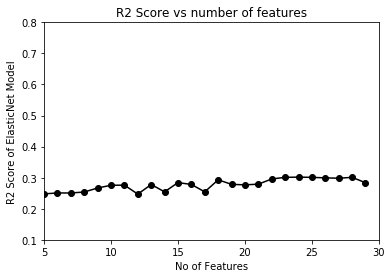

In [0]:
plt.scatter(np.array(nn_list),  np.array(r2_list), color='black')
plt.plot(np.array(nn_list),  np.array(r2_list), color='black')
plt.title('R2 Score vs number of features')
plt.ylim(0.1,0.8)
plt.xlim(5,30)
plt.xlabel('No of Features')
plt.ylabel('R2 Score of ElasticNet Model')
plt.show()  

In [0]:
#Optimum number of features
opt_no = nn_list[np.argmax(r2_list)]
selector = SelectKBest(mutual_info_regression, k=opt_no)
df_new = selector.fit_transform(df_norm, y)
selected_features_opt = df_norm.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
print(opt_no)
selected_features_opt

24
Out[30]: array(['WW_RET_POND_COD (D-2)', 'WW_RET_POND_COD (D-3)',
 'WW_RET_POND_COD (-3D to D Max)',
 'WW_RET_POND_COD (-3D to 3D Mean)', 'WW_MILLAPI_COD (D-1)',
 'WW_MILLAPI_COD (-3D to D Mean)', 'WW_MILLAPI_COD',
 'WW_MILLAPI_OG (D-2)', 'WW_MILLAPI_OG (-3D to D Max)',
 'WW_MILLAPI_OG (-3D to 3D Mean)', 'WW_MILLAPI_OG',
 'WW_PONDA_OUT_COD (D-3)', 'WW_PONDA_OUT_COD (-3D to D Max)',
 'WW_PONDA_OUT_TSS (-3D to D Max)', 'PONDD_TO_B_COD (D-2)',
 'PONDD_TO_B_COD (-3D to D Mean)',
 'PONDD_TO_B_COD (-3D to 3D Mean)', 'PONDD_TO_B_PH (-3D to D Mean)',
 'PONDD_TO_B_OG_HEX (-3D to 3D Mean)', 'PONDD_TO_B_TSS_WATER (D-2)',
 'PONDD_TO_B_TSS_WATER', 'P32_32G40_COD (-3D to D Mean)',
 'P32_32G40_COD (-3D to 3D Mean)', 'P32_32G40_OG (-3D to 3D Mean)'],
 dtype=object)

In [0]:
X_selected = df[selected_features_opt]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)  
# Scale dataset
scaler = preprocessing.StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
y_train_scale = y_train 
y_test_scale = y_test

/databricks/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/databricks/python/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 return self.fit(X, **fit_params).transform(X)
/local_disk0/tmp/1606674333086-0/PythonShell.py:6: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
 import os

In [0]:
alpha = [1e-7, 1e-6, 5e-6, 0.00001, .0005, .01, .04, .05, 0.09, 0.1, .25, .5, 1]
l1_ratio = [.05, 0.1, .12, 0.2, .25, .3, .4, 0.5, .6, .8, .9]
r2 = -np.inf
for a in alpha:
  for l in l1_ratio:
    regr = ElasticNet(alpha=a, l1_ratio=l, random_state=42)
    regr.fit(X_train_scale, y_train_scale)
    y_pred = regr.predict(X_test_scale)
    if r2_score(y_test_scale, y_pred) > r2:
        a_best = a
        l_best = l
        r2 = r2_score(y_test_scale, y_pred)
regr = ElasticNet(alpha=a_best, l1_ratio=l_best, random_state=42)
regr.fit(X_train_scale, y_train_scale)
y_pred = regr.predict(X_test_scale)
r2 = r2_score(y_test_scale, y_pred)
print(a_best, l_best)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scale, y_pred))
print('Variance score: %.2f' % r2_score(y_test_scale, y_pred))

0.01 0.4
Mean squared error: 0.03
Variance score: 0.27

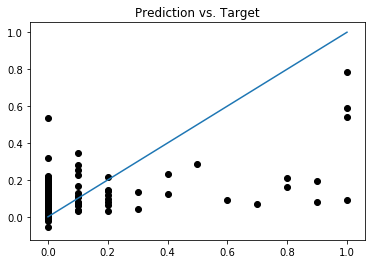

In [0]:
plt.scatter(y_test_scale,  y_pred, color='black')
sns.lineplot([0, 1],[0, 1])
plt.title('Prediction vs. Target')
plt.show()